In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
number_of_years = 26

In [3]:
borough_map_county = {
    "New York County": "Manhattan",
    "Kings County": "Brooklyn",
    "Bronx County": "The Bronx",
    "Richmond County": "Staten Island",
    "Queens County": "Queens"
}
borough_map_borough = {v: k for k, v in borough_map_county.items()}

In [4]:
df = pd.read_csv('Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
df = df.query("CountyName=='"+borough_map_borough["Manhattan"]+"' | CountyName=='"+borough_map_borough["Brooklyn"]+"'| CountyName=='"+borough_map_borough["The Bronx"]+"'| CountyName=='"+borough_map_borough["Staten Island"]+"'| CountyName=='"+borough_map_borough["Queens"]+"'")
df = df.filter(regex='31\/01\/\d{4}|CountyName')
df = df.groupby(by="CountyName", as_index=False).mean()

In [5]:
x_data = pd.to_datetime(df.columns.values[number_of_years*-1:])

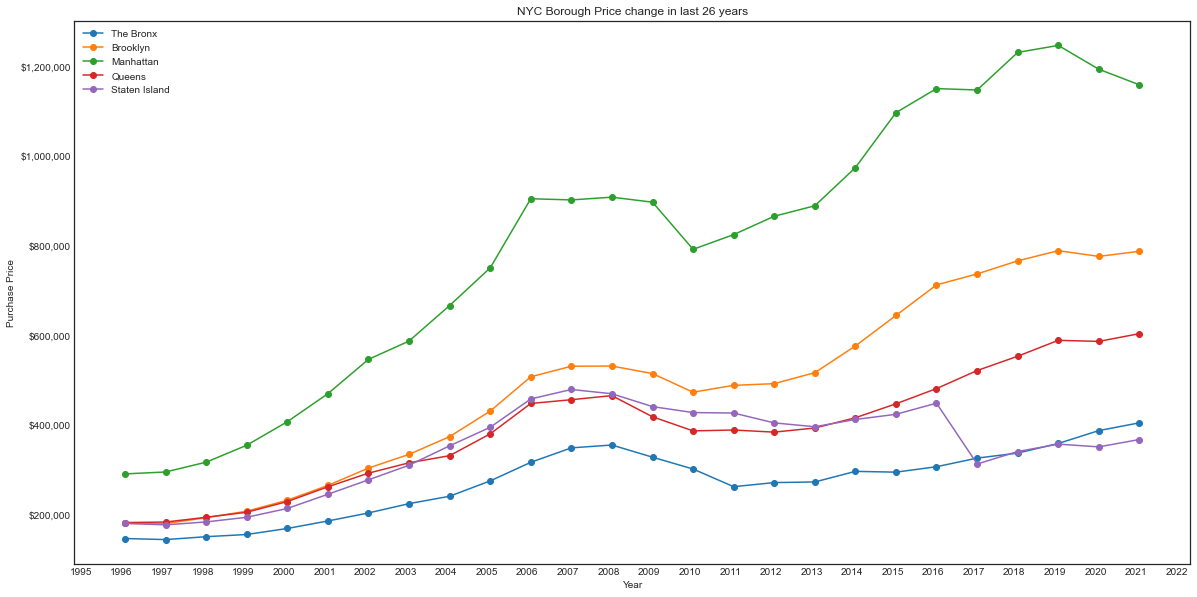

In [6]:
plt.style.use('seaborn-white')

fig = plt.figure(1, figsize=(20, 10))
fig = plt.figure(1)
sub_plot = fig.add_subplot(1,1,1)
sub_plot.xaxis.set_major_locator(mdates.YearLocator()) 
sub_plot.yaxis.set_major_formatter('${x:1,.0f}')

plt.title("NYC Borough Price change in last {} years".format(number_of_years))
sub_plot.set_xlabel('Year')  
sub_plot.set_ylabel('Purchase Price')
    
for index, row in df.iterrows():
    label = borough_map_county[row[df.columns.get_loc("CountyName")]]
    y_data = row.iloc[number_of_years*-1:]
    plot = sub_plot.plot(x_data, y_data, '-o', label=label)

#plt.legend(bbox_to_anchor =(1, 1), ncol = 3)
plt.legend()
plt.show()